In [1]:
import os
import zipfile
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt


In [3]:
# Extract ZIP 
# Unzip dataset
zip_path = 'ADL_&_Fall_Dataset_1.0.zip'
extract_to = 'ADL_Fall_Extracted'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)
print("ZIP extraction completed.")

ZIP extraction completed.


In [4]:
#  Load All CSVs with Labels
data_list = []
label_list = []

for root, dirs, files in os.walk(extract_to):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(root, file)
            try:
                df = pd.read_csv(file_path, header=None)
                df = df.apply(pd.to_numeric, errors='coerce')
                if df.shape[1] > 5:  # Ignore any malformed or empty files
                    data_list.append(df)
                    # Label: 1 = Fall, 0 = ADL
                    label = 1 if 'F' in file.upper() else 0
                    label_list.extend([label] * len(df))
            except Exception as e:
                print(f" Error reading {file_path}: {e}")

# Combine data
combined_data = pd.concat(data_list, ignore_index=True)
labels = pd.Series(label_list)

# Clean missing rows
combined_data = combined_data.dropna().reset_index(drop=True)
labels = labels.loc[combined_data.index].reset_index(drop=True)

print(" Data loaded successfully.")

 Data loaded successfully.


In [5]:
# After combining all files (from your earlier steps)
print(" Dataset Size:")
print(f"Rows: {combined_data.shape[0]}, Columns: {combined_data.shape[1]}")

print("\n Column Names:")
for i, col in enumerate(combined_data.columns):
    print(f"{i}: {col}")

print("\n Sample Rows:")
print(combined_data.head())

print("\n Missing Values:")
print(combined_data.isnull().sum())

print("\n Label Distribution:")
print(labels.value_counts())

 Dataset Size:
Rows: 378733, Columns: 12

 Column Names:
0: 0
1: 1
2: 2
3: 3
4: 4
5: 5
6: 6
7: 7
8: 8
9: 9
10: 10
11: 11

 Sample Rows:
     0      1     2     3     4     5     6     7     8     9     10    11
0  0.28  -7.35 -1.31 -0.52  0.54  0.21  5.11 -8.74  0.81 -1.06 -1.23  1.22
1 -1.72 -12.77 -2.95 -0.43  0.12 -0.42  4.85 -9.70  2.04 -0.78 -0.10  0.04
2 -3.07 -11.24 -2.24  0.31 -0.25  0.11  2.14 -8.98  1.75 -0.54  0.42 -0.12
3  0.98  -7.04 -2.36  0.32 -0.68  0.93  0.17 -9.17  2.37 -0.83 -0.46  0.23
4  2.85  -7.04 -3.96  0.07 -0.13  0.59  0.59 -9.30  2.42 -0.84 -1.37  0.48

 Missing Values:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
dtype: int64

 Label Distribution:
0    233093
1    145640
Name: count, dtype: int64


In [9]:
# Rename Sensor Columns
columns = [
    'Accel_X1', 'Accel_Y1', 'Accel_Z1',
    'Gyro_X1', 'Gyro_Y1', 'Gyro_Z1',
    'Accel_X2', 'Accel_Y2', 'Accel_Z2',
    'Gyro_X2', 'Gyro_Y2', 'Gyro_Z2'
] 

combined_data.columns = columns[:combined_data.shape[1]]
combined_data.head()


,Accel_X1,Accel_Y1,Accel_Z1,Gyro_X1,Gyro_Y1,Gyro_Z1,Accel_X2,Accel_Y2,Accel_Z2,Gyro_X2,Gyro_Y2,Gyro_Z2
0,0.28,-7.35,-1.31,-0.52,0.54,0.21,5.11,-8.74,0.81,-1.06,-1.23,1.22
1,-1.72,-12.77,-2.95,-0.43,0.12,-0.42,4.85,-9.70,2.04,-0.78,-0.10,0.04
2,-3.07,-11.24,-2.24,0.31,-0.25,0.11,2.14,-8.98,1.75,-0.54,0.42,-0.12
3,0.98,-7.04,-2.36,0.32,-0.68,0.93,0.17,-9.17,2.37,-0.83,-0.46,0.23
4,2.85,-7.04,-3.96,0.07,-0.13,0.59,0.59,-9.30,2.42,-0.84,-1.37,0.48


In [11]:
# Preprocessing – Scaling and Splitting
scaler = StandardScaler()
X_scaled = scaler.fit_transform(combined_data)
y = labels.values

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

print(" Preprocessing Complete")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


 Preprocessing Complete
X_train shape: (302986, 12)
X_test shape: (75747, 12)


In [12]:
# Build the Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,545 (174.00 KB)

 Trainable params: 44,545 (174.00 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Train the Model
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
3788/3788 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.6660 - loss: 0.6086 - val_accuracy: 0.7173 - val_loss: 0.5438
Epoch 2/100
3788/3788 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.7100 - loss: 0.5510 - val_accuracy: 0.7404 - val_loss: 0.5127
Epoch 3/100
3788/3788 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.7244 - loss: 0.5265 - val_accuracy: 0.7540 - val_loss: 0.4880
Epoch 4/100
3788/3788 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.7370 - loss: 0.5056 - val_accuracy: 0.7626 - val_loss: 0.4719
Epoch 5/100
3788/3788 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.7470 - loss: 0.4920 - val_accuracy: 0.7706 - val_loss: 0.4560
Epoch 6/100
3788/3788 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.7530 - loss: 0.4823 - val_accuracy: 0.7779 - val_loss: 0.4463
Epoch 7/100
3788/3788 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.7569 - loss: 0.4744 - val_accuracy: 0.7867 - val_loss: 0.4323
Epoch 8/100
3788/3788 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.7640 -

In [14]:
#  Evaluate the Model
loss, acc = model.evaluate(X_test, y_test)
print(f" Final Test Accuracy: {acc:.4f}")

y_probs = model.predict(X_test)
y_preds = (y_probs > 0.5).astype(int)

print(" Confusion Matrix:\n", confusion_matrix(y_test, y_preds))
print("\n Classification Report:\n", classification_report(y_test, y_preds))


2368/2368 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8625 - loss: 0.2949
 Final Test Accuracy: 0.8612
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
 Confusion Matrix:
 [[41991  4628]
 [ 5882 23246]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89     46619
           1       0.83      0.80      0.82     29128

    accuracy                           0.86     75747
   macro avg       0.86      0.85      0.85     75747
weighted avg       0.86      0.86      0.86     75747



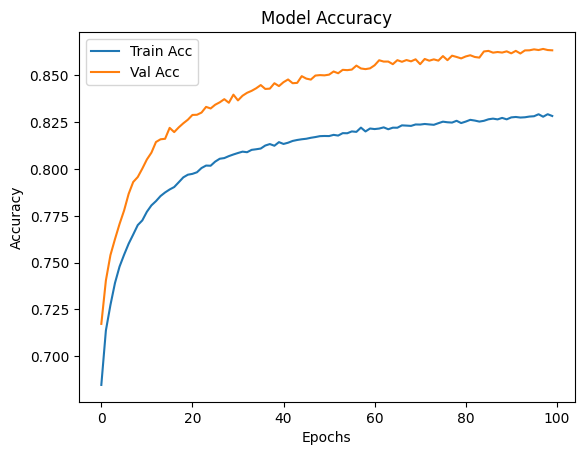

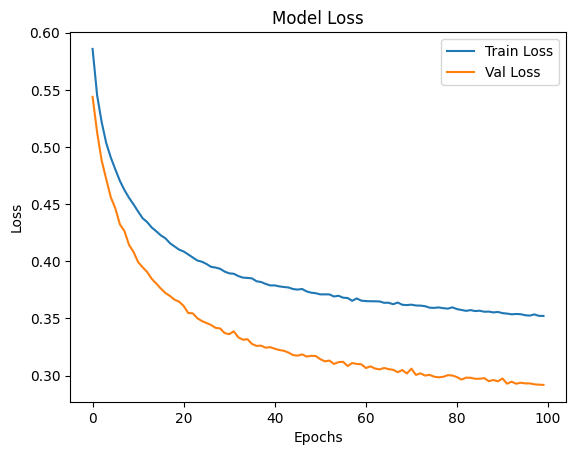

In [15]:
#Plot Accuracy and Loss
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [16]:
# Save model
model.save("fall_detection_model.h5")

# Convert to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Save TFLite file
with open("fall_detection_model.tflite", "wb") as f:
    f.write(tflite_model)

print(" TFLite model exported: fall_detection_model.tflite")


INFO:tensorflow:Assets written to: C:\Users\ASUS\AppData\Local\Temp\tmp5rupzft_\assets


INFO:tensorflow:Assets written to: C:\Users\ASUS\AppData\Local\Temp\tmp5rupzft_\assets


Saved artifact at 'C:\Users\ASUS\AppData\Local\Temp\tmp5rupzft_'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 12), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2297343262352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2297415142480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2297415142672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2297415142096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2297415141904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2297415143056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2297415144016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2297415144400: TensorSpec(shape=(), dtype=tf.resource, name=None)
 TFLite model exported: fall_detection_model.tflite
